In [11]:
from langgraph.graph import StateGraph, START, END
from pydantic.v1.fields import FieldInfo as FieldInfoV1
from typing import TypedDict
from langchain_google_genai import GoogleGenerativeAI
from dotenv import load_dotenv

In [12]:
load_dotenv()

True

In [13]:
class BlogStates(TypedDict):
    title: str
    outline: str
    content: str

In [14]:
model = GoogleGenerativeAI(model="gemini-3-flash-preview")

In [17]:
def title_outline(state: BlogStates) -> BlogStates:
    title = state['title']
    prompt = f"Generate a blog outline about: {title}\nOutline:"
    outline = model.invoke(prompt)
    state['outline'] = outline
    return state

In [16]:
def content_generation(state: BlogStates) -> BlogStates:
    outline = state['outline']
    prompt = f"Write a detailed blog post based on the following outline:\n{outline}\n\nBlog Post:"
    content = model.invoke(prompt)
    state['content'] = content
    return state

In [18]:
graph = StateGraph(BlogStates)

graph.add_node('outline' , title_outline)
graph.add_node('content', content_generation)

graph.add_edge(START, 'outline')
graph.add_edge('outline', 'content')
graph.add_edge('content', END)

workflow = graph.compile()

In [21]:
blog = workflow.invoke({'title': 'The Future of AI in Everyday Life'})
print(blog['outline'])

This outline explores the transition of Artificial Intelligence from a novelty tool to an invisible, essential utility in our daily routines.

---

# Title Idea: The Invisible Assistant: How AI Will Reshape Our Everyday Lives by 2030

## I. Introduction
*   **The Hook:** A "day in the life" snapshot of a future morning (AI-managed sleep cycles, automated coffee, and a personalized news brief).
*   **The Shift:** Moving from "Generative AI" (chatting with bots) to "Agentic AI" (AI that takes action).
*   **Thesis Statement:** AI is evolving from a tool we use into a silent partner that optimizes our health, home, and productivity.

## II. The Hyper-Personalized Smart Home
*   **Beyond Voice Commands:** Moving from "Alexa, turn on the lights" to homes that adjust lighting and temperature based on your cortisol levels or mood.
*   **The AI Kitchen:** Smart fridges that track expiration dates and AI chefs that suggest recipes based on your specific nutritional deficiencies that day.
*   **

In [22]:
print(blog['content'])

# The Invisible Assistant: How AI Will Reshape Our Everyday Lives by 2030

It’s 7:00 AM in the year 2030. You aren't jolted awake by a blaring alarm. Instead, your bedroom windows gradually transition from opaque to transparent, letting in a simulated sunrise that perfectly matches your circadian rhythm. As you sit up, your smart glasses provide a subtle, 10-second visual brief: your sleep quality was optimal, your blood glucose is stable, and your first meeting has been pushed back by fifteen minutes because your AI assistant noticed a slight delay in your colleague’s commute. By the time you reach the kitchen, a cup of coffee is waiting—brewed exactly to the strength you need based on last night’s REM cycle.

This isn’t science fiction; it is the inevitable evolution of our relationship with technology. We are currently transitioning from the era of **Generative AI**—where we "chat" with bots like ChatGPT—to the era of **Agentic AI**. In this new phase, AI doesn’t just answer questio

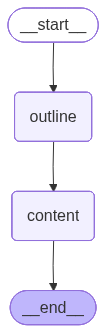

In [23]:
workflow